# Polar plot for one category, multiple experiments

## Get experiments in this category

In [3]:
import os
drive_path = '/media/stephen/Brain20191/allen-brain-observatory/visual-coding-2p/'
if not os.path.isdir(drive_path):
    drive_path = '/media/alihamodi/Brain2019/allen-brain-observatory/visual-coding-2p/'

In [16]:
targeted_structure = 'VISp'
imaging_depth = 175
cre_line = 'Cux2-CreERT2'

In [12]:
import warnings; warnings.simplefilter('ignore')
from utils.polarplot import *
from utils.polardata import *
from utils.data_wrappers import *
import os
import pandas as pd
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
from utils.data_wrappers import *
manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [24]:
exps = boc.get_ophys_experiments(stimuli=[stim_info.DRIFTING_GRATINGS],
        targeted_structures = [targeted_structure],
        imaging_depths = [imaging_depth],
        cre_lines = [cre_line])
print ("There are", len(exps), "experiments")
exps

There are 8 experiments


[{'id': 704298735,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 111,
  'experiment_container_id': 701412138,
  'session_type': 'three_session_A',
  'donor_name': '382421',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-382421',
  'fail_eye_tracking': True},
 {'id': 510514474,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 88,
  'experiment_container_id': 511510718,
  'session_type': 'three_session_A',
  'donor_name': '231584',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-231584',
  'fail_eye_tracking': True},
 {'id': 501704220,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 104,
  'experiment_container_id': 511510736,
  'session_type': 'three_session_A',
  'donor_na

## Generate data

In [33]:
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

def get_avg_cell_polar_in_experiment(boc, ec_id, exp_id, cells):
    """
    Get the polar data for all cells in this experiment, then average them out to get a single polar data.
    """
    in_category_cells = cells[cells.experiment_container_id == ec_id]
    dg_response_filter = get_dg_response_filter_from_saskia()
    filtered_cells = get_filtered_cells(in_category_cells, dg_response_filter)
    filtered_cells = filtered_cells[filtered_cells.dsi_dg > 0.5]
    print ("In this experiment, we have", len(in_category_cells),
           "cells, but after filtering, we have", len(filtered_cells), "cells")
    
    thetas = []
    rs = []
    cell_ids = []
    for cell_specimen_id in filtered_cells.cell_specimen_id:
        one_cell_polar_data_dict = get_avg_normalized_response(
            boc=boc,
            session_id=exp_id,
            cell_specimen_id = cell_specimen_id,
            temporal_frequency=2.0)
        if one_cell_polar_data_dict is None:
            continue
        theta, r = convert_polar_dict_to_arrays(one_cell_polar_data_dict)
        thetas.append(theta)
        rs.append(r)
        cell_ids.append(cell_specimen_id)
    agg_theta, agg_r = get_avg_polar(thetas, rs)
    return agg_theta, agg_r

thetas = []
rs = []
for exp in exps:
    e_id = exp['id']
    ec_id = exp['experiment_container_id']
    print("Processing experiment", e_id)
    theta, r = get_avg_cell_polar_in_experiment(boc, ec_id, e_id, cells)
    thetas.append(theta)
    rs.append(r)

agg_theta, agg_r = get_avg_polar(thetas, rs)

Processing experiment 704298735
In this experiment, we have 157 cells, but after filtering, we have 25 cells
Processing experiment 510514474
In this experiment, we have 402 cells, but after filtering, we have 34 cells
Processing experiment 501704220
In this experiment, we have 225 cells, but after filtering, we have 33 cells
Processing experiment 502205092
In this experiment, we have 396 cells, but after filtering, we have 66 cells
Processing experiment 501271265
In this experiment, we have 295 cells, but after filtering, we have 66 cells
Processing experiment 501836392
In this experiment, we have 243 cells, but after filtering, we have 37 cells
Processing experiment 510517131
In this experiment, we have 396 cells, but after filtering, we have 51 cells
Processing experiment 502115959
In this experiment, we have 305 cells, but after filtering, we have 44 cells


## Plot em

### Final result

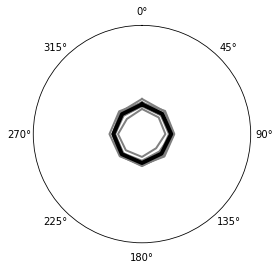

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot_population(ax=axes,
    bold_theta = agg_theta,
    bold_r = agg_r,
    grey_thetas = thetas, 
    grey_rs = rs)

### Per experiment

exp id 502115959


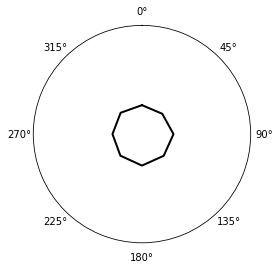

exp id 502115959


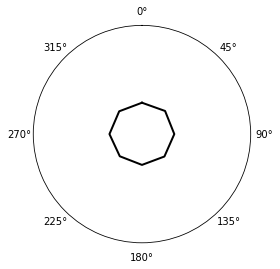

exp id 502115959


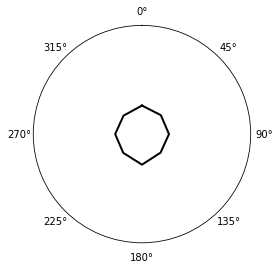

exp id 502115959


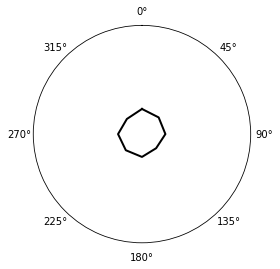

exp id 502115959


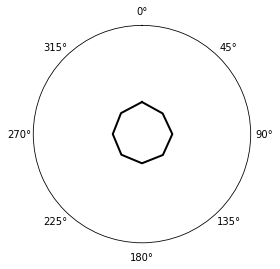

exp id 502115959


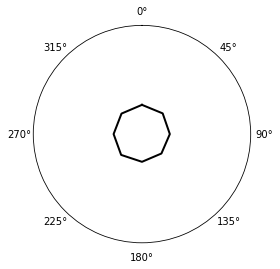

exp id 502115959


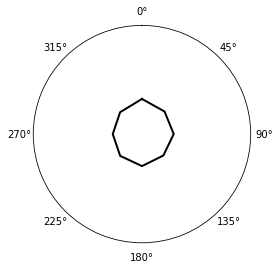

exp id 502115959


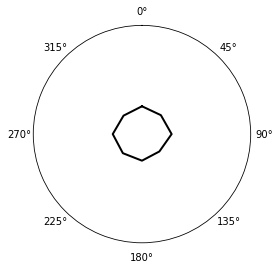

In [35]:
for i in range(len(exps)):
    e_id = exp['id']
    print ("exp id", e_id)
    fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
    polar_plot(axes, thetas[i], rs[i])
    plt.show()